# Seleccion de las acciones

In [ ]:
#Se llaman las librerias que se van a usar en el desarrollo del proyecto
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from google.colab import drive
import urllib.request
import zipfile
import yfinance as yf

El portafolio de inversión, con empresas americanas, sera conformado por:

*   Schlumberger Limited (SLB)
*   NVIDIA Corporation (NVDA)
*   Mastercard Inc. (MA)
*   Comerica Incorporated (CMA)
*   Advanced Micro Devices, Inc. (AMD)
*   Visa Inc. (V)

**¿A qué riesgos macroeconómicos se desea se exponga el portafolio?**

Los riesgos macroeconómicos a los que se va a exponer el portafolio radican en:


*   Inlfación: Es de bien saber que Estados Unidos ha mantenido niveles de inflación "altos" desde Abril de 2021, y que a día de hoy si bien sus niveles han comenzado a bajar, la inflación se a mostrado en una tendencia a mantener sus niveles.
*   Tasa de interés: Debido a la inflación mencioanda, la FED ha tomado medidas de alza en las tasas de interés, lo cual a afectado el poder adquisitivo de las personas, y cambia el panorama de financiamiento de las compañias, en muchos casos, en sectores como lo es tecnoglogía, esta se ha visto afectada por sus altos niveles de apalancamiento. A su vez, la política monetaria se ha mantenido firme en no empezar recortes en la tasa de interés hasta que se muestre una disminución en la inflación.
*   Riesgo de recesión: A razón de la inflación, tasa de interes y tasa de desempleo, diferntes analistas financieros consideraron una posible recesión en Estados Unidos, lo que sacudria los mercados de capitales y la política monetaria.
*   Eventos geopolíticos: Un factor a considerar han sido las diferentes guerras que han tomado lugar en medio oriente, que afectana a Estados Unidos debido a la presencia


**¿Por qué se seleccionan estos riesgos dada la coyuntura económica
actual?**

La razón principal por la que se escogen los activos aun teniendo en cuenta los riesgos asociados a este se debe a la espectativa de una continua disminución en la inflación, pues si bien esto no sera a un plazo inmediato, al mediano plazo se espera que se retornen a niveles de inflación bajos, lo que a su vez retornaria las tasas de interés a niveles previos a picos de inflación.

Sumado a esto, algunos de los incetivos de estos activos al momento de inversión son:


*   Rentabilidad potencial positiva en todos los activos.
*   Beta entre el 0.95 y el 1.75.






In [ ]:
Tickers=['SLB','NVDA','CMA','AMD','V','MA']

for firm in Tickers:
  D_ticker = yf.Ticker(firm)
  D_cons=D_ticker.history(period="max")
  D_close=pd.DataFrame(D_cons['Close'])
  D_close.rename(columns = {'Close':firm}, inplace = True)
  if firm==Tickers[0]:
    D_Series = D_close.copy()
  else:
    D_Series=D_Series.join(D_close , how='outer')
D_Series.tail(5)

,SLB,NVDA,CMA,AMD,V,MA
Date,,,,,,
2024-05-24 00:00:00-04:00,46.240002,1064.689941,50.770000,166.360001,274.489990,451.179993
2024-05-28 00:00:00-04:00,46.529999,1139.010010,50.470001,171.610001,270.980011,445.079987
2024-05-29 00:00:00-04:00,45.639999,1148.250000,49.459999,165.139999,268.859985,442.470001
2024-05-30 00:00:00-04:00,45.590000,1105.000000,50.060001,166.750000,271.299988,442.100006
2024-05-31 00:00:00-04:00,45.889999,1096.329956,51.240002,166.899994,272.459991,447.070007


In [ ]:

def Consulta_Valor(Tickers, D_indicador):
  '''Dados unos tickers y el nombre de un indicador, esta función
    crea un diccionario con el valor de indicador para cada firma.  Cuando
    no hay registro del indicador se registra como nulo'''

  for firm in Tickers:
    D_ticker = yf.Ticker(firm)
    D_Info=D_ticker.info
    if D_indicador in D_Info:                     # Verifica que el indicador esté en la consulta
      if firm == Tickers[0]:
        D_Valor={firm:float(D_Info[D_indicador])}
      else:
        D_Valor[firm]=float(D_Info[D_indicador])
    else:
      if firm == Tickers[0]:
        D_Valor={firm:np.nan}
      else:
        D_Valor[firm]=np.nan
  return D_Valor

## **MARKET CAP**

In [ ]:
D_indicador='marketCap'
D_Valor=Consulta_Valor(Tickers, D_indicador)
print(D_Valor)

{'SLB': 65592414208.0, 'NVDA': 2696785428480.0, 'CMA': 6793758208.0, 'AMD': 269762134016.0, 'V': 557480411136.0, 'MA': 415602966528.0}


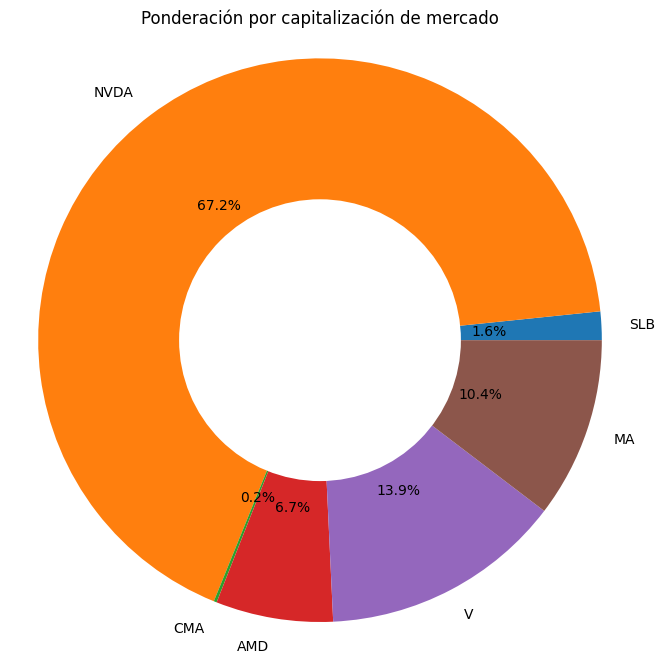

In [ ]:
# Extrae los valores y etiquetas del diccionario
values = list(D_Valor.values())
labels = list(D_Valor.keys())

fig, ax = plt.subplots(figsize=(8, 8))
ring_size = 0.5
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=0)
circle = plt.Circle((0, 0), ring_size, fc='white')
ax.add_artist(circle)
ax.axis('equal')
plt.title('Ponderación por capitalización de mercado')
plt.show()

In [ ]:
for ticker in Tickers:
    volumen = yf.Ticker(ticker).info['volume']
    print(f"Valor en libros de {ticker} : {volumen}")

Valor en libros de SLB : 38270281
Valor en libros de NVDA : 60482557
Valor en libros de CMA : 1671422
Valor en libros de AMD : 63477036
Valor en libros de V : 8884221
Valor en libros de MA : 1989008


**Descripción**

El marketcap se entiende como el valor de una empresa u compañia en el mercado, el cual esta determinado por el valor de las acciones en circulación y su precio de mercado. Nos ayuda a observar el tamaño de las compañias.

La fórmula para calcular el valor futuro de una inversión simple es:

$$\text{Marketcap} = \text{acciones en circulación} \times \text{precio de la acción}$$

El volumen se puede entender como el número de transacciones, compra o venta, de una acción.

**Interpretación**

En lo que respecta la capitalización de mercado, si bien no todas pertenecen a un mismo grupo de clasificación (large, mid, small), donde si bien la mayoria de las empresas son "Large cap", que bajo la teoría se entienden como compañias más grandes y consolidadas, a su vez, los volumenes en compañias grandes tienden a ser mayores, lo que da una mayor liquidez al momento de salir a liquidar las posición .Se incluye CMA como "Mid Cap" para tomar algunos retornos que generan a su vez las compañias de tamaño medio.


## **BETA**

{'SLB': 1.644, 'NVDA': 1.749, 'CMA': 1.29, 'AMD': 1.66, 'V': 0.953, 'MA': 1.075}


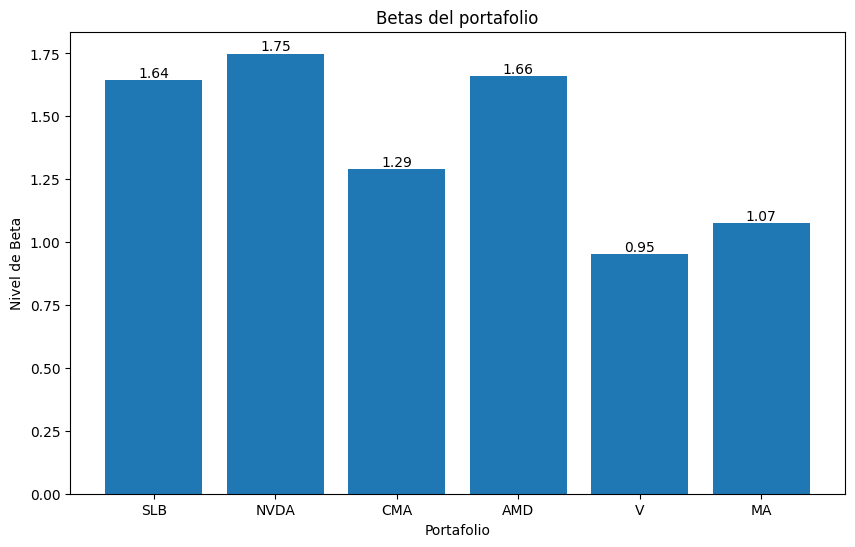

In [ ]:
D_indicador = 'beta'
D_Valor = Consulta_Valor(Tickers, D_indicador)
print(D_Valor)

values = list(D_Valor.values())
labels = list(D_Valor.keys())

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values)

for i, v in enumerate(values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.title('Betas del portafolio')
plt.xlabel('Portafolio')
plt.ylabel('Nivel de Beta')
plt.show()

**Descripción**

El beta se puede entener como la sensibilidad que tiene una acción o portafolio ante movimientos del mercado.

**Interpretación**

Ya en lo que respecta al beta, se busca crear un portafolio agresivo, el cual sera dividido en dos grupos, los betas más agresivos superan el 1.5 buscando mejorar rendiemientos por asumir mayor riesgo y los betas que van a diversificar y a "regular" el portafolio oscilan entre el 1.25 y el 0.95, esta diversificación radica en buscar diversificación y "mitigación" en la exposición al riesgo.

## **RENTABILIDAD DIARIA**

Rentabilidad diaria promedio:
SLB     0.000454
NVDA    0.001858
CMA     0.000481
AMD     0.001146
V       0.000922
MA      0.001247
dtype: float64


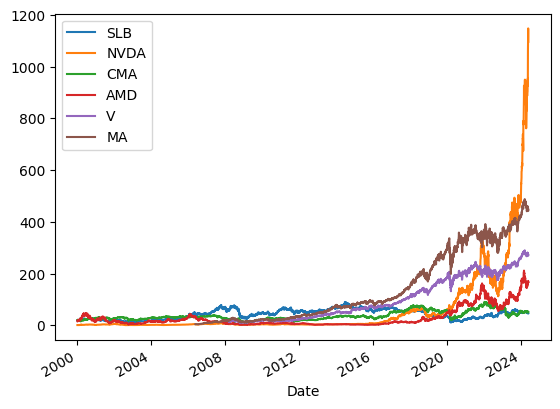

In [ ]:
close = pd.DataFrame()
for ticker in Tickers:
  close[ticker]=yf.Ticker(ticker).history(start='2000-01-01').Close

# Calcular la rentabilidad diaria para cada acción
rent_diaria = close.pct_change()
# Calcular la rentabilidad diaria promedio para cada acción
rent_promedio = rent_diaria.mean()
print("Rentabilidad diaria promedio:")
print(rent_promedio)

close.plot()
plt.show()

**Descripción**

La rentabilidad diaria, básicamente lo que muestra es el rendimiento de la acción día tras día, y si su movimientos fueron positivos o negativos respecto al día anterior.

La rentabilidad diaria se obtiene de la división del close anterior sobre el close más reciente menos 1.


$$\text{Rentabilidad diaria} = \frac{\text{Close anterior}}{\text{Close reciente}} - 1$$

Una vez se obtiene la rentabilidad diaria de todos los periodos, se hace el promedio de todos los valores para obtener la rentabiliad diaria promedio.

**Interpretación**

Otro aspecto a resaltar de la acciones seleccionadas es que todas han tenido en promedio rentabilidades diarias positivas, lo que nos indica que las compañias en el día a día si han tenido una tendencia alcista o de crecimiento, que a su vez indica una solidificación en el mercado, se compara desde el año 2000 para que no se vean afectadas las compañaias más joves.

## **RENTABILIDAD POTENCIAL**

In [ ]:
for ticker in Tickers:
    target_price = yf.Ticker(ticker).info['targetMeanPrice']
    previous_close = yf.Ticker(ticker).info['previousClose']
    rent_potencial = target_price / previous_close - 1

    print(f"Rentabilidad Potencial de {ticker} : {rent_potencial:.2%}")

Rentabilidad Potencial de SLB : 45.67%
Rentabilidad Potencial de NVDA : 3.19%
Rentabilidad Potencial de CMA : 17.82%
Rentabilidad Potencial de AMD : 12.14%
Rentabilidad Potencial de V : 14.40%
Rentabilidad Potencial de MA : 15.90%


**Descripción**

La finalidad de la rentabilidad potencial es evidenciar en porcentaje el crecimiento posible que puede tener una empresa con base en sus desempeño, el precio objetivo es fijado bajo las estimaciones de los analistas según el desempeño de la acción. La rentabilidad potencial puede ser tanto positiva como negativa, una rentabilidad potencial positiva nos indica un aproximado de que tanto puede seguir subiendo el valor de la acción de una compañia en el mercado, sin embargo, una rentabilidad negativa indica que tanto bajar el valor de la acción de una compañia en el mercado.

Para hacer el calculo de la rentabilidad potencial se debe llevar a cabo la

$$\text{Rentabilidad potencial} = \frac{\text{Precio Objetivo}}{\text{Último precio}} - 1$$

**Interpretación**

Por otro lado, muy relacionado a la rentabilidad promedio diaria tambien se encuentra la rentabilidad potencial, que en pocas palabras nos indica si se tiene una perspectiva de crecimiento o decrecimiento en el valor de la acción, de lo cual se debe resaltar que todas las compañias aun tienen perspectivas de crecimiento en su valor de mercado, lo que es positivo para el portafolio en caso de materializarse debido a que aumentara el valor de las posiciones.

De acá se debe resaltar la inclusión de la acción SLB por su alto potencial de crecimiento, lo que en caso de materializarse puede tener un impacto positivo en los retornos del portafolio.

## **RECOMENDACIONES DE ANALISTAS**

In [ ]:
recomendaciones = {}
for ticker in Tickers:
  recomendaciones[ticker]=yf.Ticker(ticker).recommendations
for ticker, recommendation in recomendaciones.items():
    print(f"\n Recomendaciones para {ticker}")
    print(recommendation)


 Recomendaciones para SLB
  period  strongBuy  buy  hold  sell  strongSell
0     0m          7   19    11     0           0
1    -1m          8   21     3     0           0
2    -2m          7   21     3     0           0
3    -3m          8   18     4     0           0

 Recomendaciones para NVDA
  period  strongBuy  buy  hold  sell  strongSell
0     0m          7   14    15     1           1
1    -1m         20   34     4     0           0
2    -2m         19   33     4     0           0
3    -3m         12   21    12     2           0

 Recomendaciones para CMA
  period  strongBuy  buy  hold  sell  strongSell
0     0m          2    8    15     1           1
1    -1m          5    3    14     3           0
2    -2m          5    4    12     3           0
3    -3m          3    4    10     5           2

 Recomendaciones para AMD
  period  strongBuy  buy  hold  sell  strongSell
0     0m          5    6    15     4           1
1    -1m         14   25    11     0           0
2    -2m 

**Interpretación**

Un aspecto tambien tomado en cuenta es la opinión de los analistas sobre las posiciones consideradas sobre cada una de las acciones, de lo cual hay que resaltra que en cada una de ellas se resalta que son muy pocas las recomendaciones de sell a compración de strongBuy, buy, hold, esto a su vez indica la espectativa al alza por parte de los inversionistas, cabe resalta que estas recomendaciones son de los 4 meses anteriores empezando en Febrero (-3) y terminando en Mayo (0).

En lo que respecta a **SLB**, en el transcurso de estos cuatro meses, hay que resaltar el aumento para el último mes donde hay un aumento en las recomendaciones de hold lo cual puede estar asociado a esperar confirmaciones del mercado para saber la posicion a tomar. Otro punto a resaltar es que en ninguno de los cuatro meses se tiene recomendaciones de ventao o venta fuerte.

En lo que respecta a **NVDA**, en el transcurso de estos cuatro meses, hay que resaltar el gran número de analistas con posiciones en compra fuerte, lo cual ha estado asociado a su gran desemepeño en el mercado a lo largo del año de la mano del desarrollo de micro chips y todo lo relacionado a la IA. Un punto a resaltar es que para el último periodo si se presentan recomendaciones de venta, lo que puede suponer espectativas de que la acción esta sobre valorada y su valor puede empezar a caer.

En lo que respecta a **CMA**, en el transcurso de estos cuatro meses, hay que resaltar la fuerte posición de los analistas de mantenerse en la inversión y no se inclinan por posiciones long o short, lo cual puede estar relacionado a la incertidumbre al rededor de la tasa de interés en Estados Unidos, teniendo en cuenta que es una empresa financiera, se va a ver muy afectada por cualquier movimiento en la tasa de interés.

En lo que respecta a **AMD**, en el transcurso de estos cuatro meses, hay que resaltar que en los tres primeros meses se tiene una posición fuerte de compra la cual esta asociada principalmente a todo el revuelo de la generación de microchips y su implementación el desarrollo de IA, algo muy similar a Nvidia, las cuales han sido compañías muy activas este año por este "rally" tecnológico al rededor de la IA. Sin embargo, tambien una gran parte de los analistas mantienen posición de hold, debido a que ha sido un sector de alta volatilidad.

En lo que respecta a **V** y **MA**, en el transcurso de estos cuatro meses, hay que resaltar que se han mantenido en un análisis de compra fuerte y compra, resaltando la fuerza en este último aspecto, lo que nos indica que los analistas tiene perspectivas de crecimiento sobre el valor de la acción, a su vez, esto es respaldado en que no se tiene ningun análisis de venta, a excepción de la sugerencia de venta en **MA** para su último periodo.

Bibliografia

https://pypi.org/project/yfinance/0.2.40/

# Retornos en pesos y dólares de las acciones

A. Construccion de clase que consulte a Yahoo los precios de un conjunto de acciones
y la tasa de cambio entre el peso colombiano (COP) y el dólar estadounidense
(USD). La clase debe incluir:
a. Un método que consulta los precios diarios y valida que hay al menos
15 años de historia.
b. Un método que consulta la tasa de cambio entre pesos colombianos y el
dólar americano y valida que hay al menos 15 años de historia

2. Método en la clase que calcula los retornos semanales a partir de los retornos diarios en diferentes monedas desde el primero de enero de 2014 hasta la fecha. a. Un método que crea los retornos semanales de las acciones en dólares americanos b. Un método que crea los retornos semanales de las acciones en pesos colombianos. i.Hay días donde hay datos de precios de acciones, pero no de tasa de cambio o al revés. este inconveniente se tratara mas adelante. c. Un método que reporta estadísticas descriptivas de las acciones en pesos y dólares, incluye para los retornos en cada una de las monedas: i. Retornos promedios ii. Volatilidad de los retornos iii. Matriz de correlaciones.

In [ ]:
class consulta_yahoo:

    def __init__(self, tickers, par_divisa, tasa_libre_riesgo=0.0548):
        ''' Método constructor'''
        self.Tickers = tickers
        self.par = par_divisa
        self.tasa_libre_riesgo = tasa_libre_riesgo  # Tasa libre de riesgo
        self.tasa_libre_riesgo_semanal = self.conversion_tasa()
        self.Precios = self.Consulta_Precios()
        self.Tasas = self.Consulta_Tasas()
        self.return_usd = self.Retornos_semanales_USD()
        self.return_cop = self.Retornos_semanales_COP()
        self.efficient_frontier_cop = None  # Inicializa el DataFrame como None para que no se cree el grafico

    def Consulta_Precios(self):
        '''Método que consulta los precios de una colección de firmas y regresa un dataframe
        con los precios de cierre, los encabezados de cada serie son los tickers'''
        D_Series = pd.DataFrame()
        for firm in self.Tickers:
            D_ticker = yf.Ticker(firm)
            D_cons = D_ticker.history(period="max")
            if D_cons.empty or (D_cons.index.year[-1] - D_cons.index.year[0] < 15):  # Validacion de 15 años de historia
                raise ValueError(f"No hay suficiente historial de datos para el ticker {firm}.")
            D_close = pd.DataFrame(D_cons['Close'])  # Guarda el precio de cierre
            D_close.rename(columns={'Close': firm}, inplace=True)  # Renombra la serie con el nombre/ticker de la firma
            if D_Series.empty:
                D_Series = D_close.copy()
            else:
                D_Series = D_Series.join(D_close, how='outer')  # Junta las series con un 'full join'
        return D_Series

    def Consulta_Tasas(self):
        '''Método que consulta las tasas de cambio entre pesos colombianos y el
        dólar americano y valida que hay al menos 15 años de historia'''
        D_ticker = yf.Ticker(self.par)
        D_cons = D_ticker.history(period="max")
        if D_cons.empty or (D_cons.index.year[-1] - D_cons.index.year[0] < 15):  # Validación de 15 años de historia
            raise ValueError(f"No hay suficiente historial de datos para la tasa de cambio {self.par}.")
        D_close = pd.DataFrame(D_cons['Close'])  # Guarda el precio de cierre
        D_close.rename(columns={'Close': self.par}, inplace=True)  # Renombra la serie con el nombre/ticker de la firma
        return D_close

    def Retornos_semanales_USD(self):
        ''' método que calcula los retornos semanales a partir de los retornos diarios
          en dolar americano desde el primero de enero de 2014 hasta la fecha'''

        datos_precios = self.Precios
        datos_precios = datos_precios[datos_precios.index.year >= 2014]

        datos_rendimientos = pd.DataFrame()
        for i in self.Tickers:
            datos_rendimientos[i] = datos_precios[i].pct_change()  # Metodo para calcular los rendimientos

        # Rendimientos semanales y desviaciones de estandar de las acciones entre 2014 y 2024 (Moneda USD)
        datos_rendimientos_filtro =  datos_rendimientos.resample('W').apply(lambda x: (x + 1).prod() - 1)

        return datos_rendimientos_filtro

    def Retornos_semanales_COP(self):
         '''método que calcula los retornos semanales a partir de los retornos diarios
          en peso colombiano desde el primero de enero de 2014 hasta la fecha'''

         datos_precios = self.Precios
         datos_tasas = self.Tasas
         # Asegurar que los índices de ambos DataFrames sean de tipo DatetimeIndex
         datos_precios.index = pd.to_datetime(datos_precios.index)
         datos_tasas.index = pd.to_datetime(datos_tasas.index)

         # Combinar los datos de precios de acciones y tasas de cambio en una sola fila por día
         merged_df = pd.merge_asof(datos_precios, datos_tasas, left_index=True, right_index=True)

         # Filtrar los datos de 2014 - 2024
         merged_df = merged_df[merged_df.index.year >= 2014]

         tickers = self.Tickers

         # Convertir los precios de las acciones a COP
         for i in tickers:
            merged_df[i] = merged_df[i] * merged_df['COP=X']

         # Calcular los rendimientos de las acciones en COP
         datos_rendimientos = pd.DataFrame()
         for i in self.Tickers:
             datos_rendimientos[i] = merged_df[i].pct_change()  # Metodo para calcular los rendimientos

         # Rendimientos semanales y desviaciones de estandar de las acciones entre 2014 y 2024 (Moneda USD)
         datos_rendimientos_filtro =  datos_rendimientos.resample('W').apply(lambda x: (x + 1).prod() - 1)

         return datos_rendimientos_filtro

    def estadisticos_descriptivos(self):
         '''método que calcula los estadisticos descriptivos de los movimientos de las acciones
         en moneda dolar estadounidense (USD) y peso colombiano (COP)
         I. Retornos promedios
         II. Volatilidad de los retornos
         III. Matriz de correlaciones
         '''

         datos_en_usd = self.return_usd
         datos_en_cop = self.return_cop

         # Calcular la media
         medias_usd = datos_en_usd.mean()
         # Calcular la desviación estándar
         desviaciones_usd = datos_en_usd.std()

         # Calcular la media
         medias_cop = datos_en_cop.mean()
         # Calcular la desviación estándar
         desviaciones_cop = datos_en_cop.std()

         print('\tMedidas  de los rendimientos entre 2014 y 2024 (en Dolar estadounidense):')
         print("\nMedias:")
         print(medias_usd)
         print("\nDesviaciones estándar:")
         print(desviaciones_usd)

         # Crear el gráfico de barras
         plt.figure(figsize=(8, 4))
         bars = plt.bar(medias_usd.index, medias_usd.values)

         # Añadir las medias encima de cada barra
         for bar in bars:
             yval = bar.get_height()
             plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 5), va='bottom', ha='center')

         # Añadir etiquetas y título
         plt.xlabel('Acciones')
         plt.ylabel('Retorno promedio')
         plt.title('Rendimientos promedios de las acciones en Dolar estadounidense')
         plt.show()

         print('')
         print('\tMatriz de Correlacion (moneda USD):')
         # Calcular la tabla de correlación de rendimientos semanales de las acciones (2014-2024) en moneda USD
         tabla_correlacion_usd = datos_en_usd.corr()
         print(tabla_correlacion_usd)

         print('-------------------------------------------------------------------------------------------------')
         print('')
         print('')
         print('\tMedidas  de los rendimientos entre 2014 y 2024 (en Peso colombiano):')
         print("\nMedias:")
         print(medias_cop)
         print("\nDesviaciones estándar:")
         print(desviaciones_cop)

         # Crear el gráfico de barras
         plt.figure(figsize=(8, 4))
         bars = plt.bar(medias_cop.index, medias_cop.values)

         # Añadir las medias encima de cada barra
         for bar in bars:
             yval = bar.get_height()
             plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 5), va='bottom', ha='center')

         # Añadir etiquetas y título
         plt.xlabel('Acciones')
         plt.ylabel('Retorno promedio')
         plt.title('Rendimientos promedios de las acciones en peso colombiano')
         plt.show()

         print('')
         print('\tMatriz de Correlacion (moneda COP):')
         # Calcular la tabla de correlación de rendimientos semanales de las acciones (2014-2024) en moneda USD
         tabla_correlacion_cop = datos_en_cop.corr()
         print(tabla_correlacion_cop)


    def conversion_tasa(self):
        '''Método que calcula una tasa dada en terminos mensuales y hace la conversion a una tasa semanal.'''

        # Obtener la tasa mensual
        tasa_mensual = self.tasa_libre_riesgo

        # Convertir la tasa
        tasa_semanal = (1 + tasa_mensual) ** (1/4) - 1

        return tasa_semanal

    def frontera_eficiente_COP(self, plot=False):
     '''Método que calcula y grafica la frontera eficiente a partir de los retornos semanales en pesos colombianos.
      Incluye un atributo que contiene en un DataFrame los puntos de la frontera eficiente en pesos colombianos.'''

    # Obtener los datos de rendimientos en COP
     datos_rendimientos = self.return_cop

    # Calcular la media y la matriz de covarianza de los rendimientos para los siguientes cálculos del portafolio
     mean_returns = datos_rendimientos.mean()
     cov_matrix = datos_rendimientos.cov()

    # Definir el número de portafolios a simular e inicialización de los resultados
     num_portfolios = 10000
     results = np.zeros((len(self.Tickers) + 3, num_portfolios))  # número de filas igual al número de tickers más 3 para num_portfolios columnas

     for i in range(num_portfolios):
        # Generar pesos aleatorios y asegurar que sumen 1
        weights = np.random.random(len(self.Tickers))
        weights /= np.sum(weights)

        # Calcular el retorno y la volatilidad del portafolio
        portfolio_return = np.sum(weights * mean_returns)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

        # Calcular el índice de Sharpe ajustado por la tasa libre de riesgo
        sharpe_ratio = (portfolio_return - self.tasa_libre_riesgo_semanal) / portfolio_stddev

        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = sharpe_ratio
        results[3:, i] = weights  # Guardar las ponderaciones (alfas) de las acciones

    # Crear las etiquetas de los tickers
     tickers_weights = [f'{ticker}_weight' for ticker in self.Tickers]

    # Crear el DataFrame de resultados
     results_frame = pd.DataFrame(results.T, columns=['Return', 'StdDev', 'Sharpe'] + tickers_weights)

    # Almacenar la frontera eficiente en el atributo efficient_frontier_cop
     self.efficient_frontier_cop = results_frame

    # Encontrar el portafolio con el mejor índice de Sharpe
     max_sharpe_idx = results_frame['Sharpe'].idxmax()
     max_sharpe_port = results_frame.iloc[max_sharpe_idx]

    # Encontrar el portafolio con la mínima volatilidad
     min_vol_idx = results_frame['StdDev'].idxmin()
     min_vol_port = results_frame.iloc[min_vol_idx]

     if plot:
        # Graficar la frontera eficiente
        plt.figure(figsize=(10, 6))
        plt.scatter(results_frame.StdDev, results_frame.Return, c=results_frame.Sharpe, cmap='YlGnBu', marker='o')
        plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=500, label='Máx. Sharpe ratio')
        plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='g', s=500, label='Mín. Volatilidad')
        plt.title('Frontera Eficiente')
        plt.xlabel('Volatilidad')
        plt.ylabel('Retorno Esperado')
        plt.colorbar(label='Sharpe Ratio')
        plt.legend()
        plt.show()
        return


    # Retornar dataframe con frontera eficiente, el portafolio eficiente y el portafolio de mínima volatilidad
     return results_frame, max_sharpe_port, min_vol_port



# Ajustar el método exceso_contribucion
    def exceso_contribucion(self):
     '''Método que calcula el exceso de la contribución de los retornos en dólares y las fluctuaciones de la tasa de cambio
       al portafolio óptimo en pesos colombianos para cada año.
       Utiliza el ETF GXG como índice de referencia de acciones colombianas.'''

    # Obtener datos históricos del ETF GXG
     GXG_ticker = yf.Ticker('GXG')
     GXG_data = GXG_ticker.history(period="max")

     if GXG_data.empty or (GXG_data.index.year[-1] - GXG_data.index.year[0] < 15):
        raise ValueError(f"No hay suficiente historial de datos para el índice GXG.")

    # Convertir los datos de GXG a pesos colombianos
     GXG_data['Close_COP'] = GXG_data['Close'] * self.Tasas['COP=X']
     GXG_data = GXG_data[GXG_data.index.year >= 2014]

    # Calcular los retornos semanales de GXG en pesos colombianos
     GXG_returns_cop = GXG_data['Close_COP'].pct_change().resample('W').apply(lambda x: (x + 1).prod() - 1)

    # Obtener los rendimientos del portafolio óptimo en pesos colombianos
     results_frame, max_sharpe_port, min_vol_port = self.frontera_eficiente_COP(plot=False)  # No mostrar gráfica
     optimal_weights = max_sharpe_port[3:]  # Pesos del portafolio óptimo

    # Asegura que los índices estén alineados
     optimal_weights.index = self.Tickers  # Asegurar que los índices coincidan con los tickers

    # Calcular los retornos del portafolio óptimo en COP
     datos_rendimientos = self.return_cop
     port_opt_returns_cop = datos_rendimientos.dot(optimal_weights)

    # Calcular los retornos del portafolio óptimo en USD
     datos_rendimientos_usd = self.return_usd
     port_opt_returns_usd = datos_rendimientos_usd.dot(optimal_weights)

    # Calcular los cambios porcentuales en la tasa de cambio
     tasa_cambio = self.Tasas['COP=X']
     q = tasa_cambio.pct_change().resample('W').apply(lambda x: (x + 1).prod() - 1)

    # Alinear los índices de todas las series de tiempo
     GXG_returns_cop = GXG_returns_cop.reindex(port_opt_returns_cop.index, method='ffill')
     q = q.reindex(port_opt_returns_cop.index, method='ffill')

    # Calcular la diferencia en el retorno entre el portafolio óptimo y el índice GXG en COP
     diff_return_cop = port_opt_returns_cop - GXG_returns_cop

    # Calcular el exceso de la contribución de los retornos en USD y la tasa de cambio
     contribucion_usd = port_opt_returns_usd - GXG_returns_cop
     contribucion_fx = q

    # Agrupar los datos por año para el gráfico
     yearly_diff_return_cop = diff_return_cop.resample('Y').apply(lambda x: (x + 1).prod() - 1)
     yearly_contribucion_usd = contribucion_usd.resample('Y').apply(lambda x: (x + 1).prod() - 1)
     yearly_contribucion_fx = contribucion_fx.resample('Y').apply(lambda x: (x + 1).prod() - 1)

    # Crear el gráfico de barras
     years = yearly_diff_return_cop.index.year
     plt.figure(figsize=(12, 6))
     plt.bar(years - 0.2, yearly_diff_return_cop, width=0.2, label='Exceso Retorno en COP')
     plt.bar(years, yearly_contribucion_usd, width=0.2, label='Contribución Retornos en USD')
     plt.bar(years + 0.2, yearly_contribucion_fx, width=0.2, label='Contribución Fluctuaciones FX')


     plt.xlabel('Años')
     plt.ylabel('Retornos')
     plt.title('Descomposición del Exceso de Contribución del Portafolio Óptimo en Pesos Colombianos')
     plt.legend()
     plt.show()

    # Retornar los datos de exceso de contribución
     return yearly_diff_return_cop, yearly_contribucion_usd, yearly_contribucion_fx

In [ ]:
Tickers = ['SLB','NVDA','CMA','AMD','V','MA']
Tasa = 'COP=X'
datos = consulta_yahoo(Tickers, Tasa)

Este metodo de Pandas (.merge_asof()) permite combinar dos DataFrames basándose en las columnas de tiempo. Busca en el DataFrame de la izquierda (primer argumento) el valor más cercano en el DataFrame de la derecha (segundo argumento) en función de una columna de referencia. En este caso, estamos utilizando los índices de los DataFrames como la columna de referencia. Esto basado con conceptos de teorias de mercado como la de paseo aletorio, que sugiere que el valor pasado que este disponible aplicara para el valor presente; en el sentido de que es el punto de partida para el siguiente paso aleatorio.

C. Incluya un método que reporta estadísticas descriptivas de las acciones en pesos y dólares, el reporte debe incluir para los retornos en cada una de las monedas al menos: i. Retornos promedios ii. Volatilidad de los retornos iii. Matriz de correlaciones.

	Medidas  de los rendimientos entre 2014 y 2024 (en Dolar estadounidense):

Medias:
SLB     0.000732
NVDA    0.012281
CMA     0.002166
AMD     0.009873
V       0.003528
MA      0.003795
dtype: float64

Desviaciones estándar:
SLB     0.053372
NVDA    0.060424
CMA     0.052213
AMD     0.078011
V       0.030173
MA      0.034045
dtype: float64


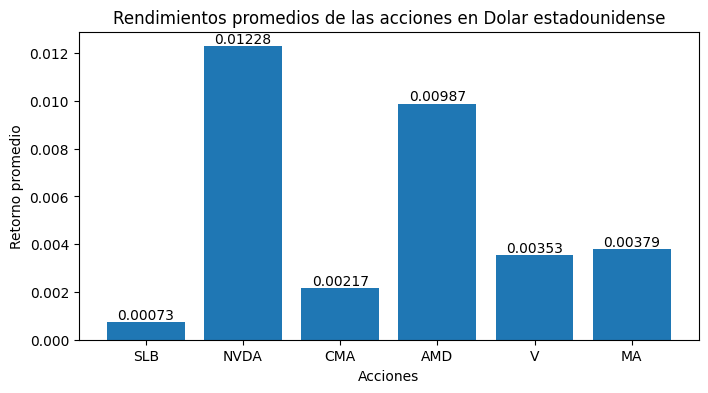


	Matriz de Correlacion (moneda USD):
           SLB      NVDA       CMA       AMD         V        MA
SLB   1.000000  0.181824  0.538488  0.176791  0.341465  0.356018
NVDA  0.181824  1.000000  0.278380  0.536103  0.431789  0.454439
CMA   0.538488  0.278380  1.000000  0.262343  0.447466  0.447442
AMD   0.176791  0.536103  0.262343  1.000000  0.319683  0.363522
V     0.341465  0.431789  0.447466  0.319683  1.000000  0.896709
MA    0.356018  0.454439  0.447442  0.363522  0.896709  1.000000
-------------------------------------------------------------------------------------------------


	Medidas  de los rendimientos entre 2014 y 2024 (en Peso colombiano):

Medias:
SLB     0.355186
NVDA    0.359885
CMA     0.364921
AMD     0.369680
V       0.363238
MA      0.362913
dtype: float64

Desviaciones estándar:
SLB     5.883294
NVDA    5.773477
CMA     6.021650
AMD     5.974589
V       5.967324
MA      5.959279
dtype: float64


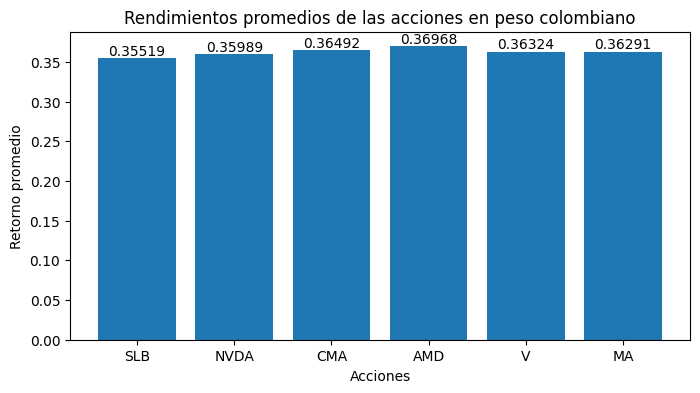


	Matriz de Correlacion (moneda COP):
           SLB      NVDA       CMA       AMD         V        MA
SLB   1.000000  0.999394  0.999955  0.999637  0.999961  0.999960
NVDA  0.999394  1.000000  0.999266  0.999885  0.999426  0.999435
CMA   0.999955  0.999266  1.000000  0.999550  0.999961  0.999959
AMD   0.999637  0.999885  0.999550  1.000000  0.999665  0.999673
V     0.999961  0.999426  0.999961  0.999665  1.000000  0.999997
MA    0.999960  0.999435  0.999959  0.999673  0.999997  1.000000


In [ ]:
datos.estadisticos_descriptivos()

# Portafolio eficiente

1. Incluya en la clase un método que genera y grafica la frontera eficiente a
partir de los retornos semanales en pesos colombianos.
a. Incluya un atributo que contiene en un DataFrame los puntos de la
frontera eficiente en pesos colombianos. 2. Para cada uno de los puntos de la frontera en pesos calcule la relación de Sharpe y cree un método que encuentra el portafolio con la mayor relación de Sharpe.

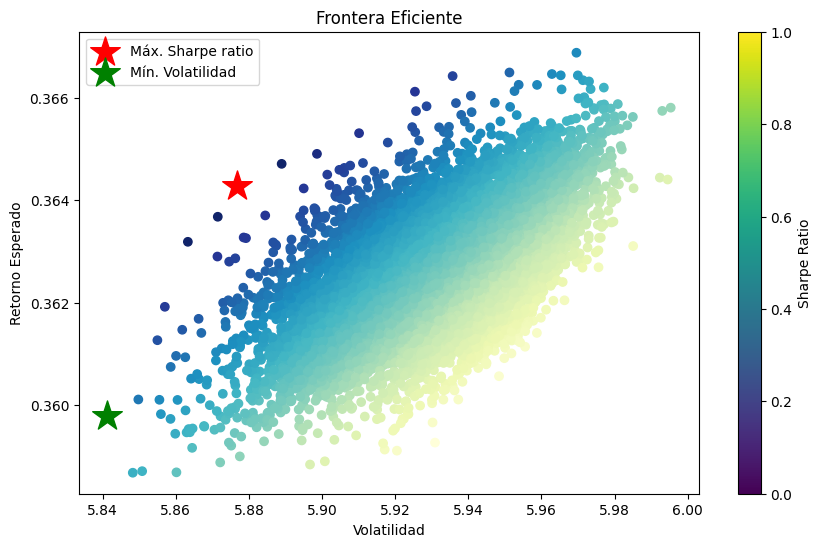

In [ ]:
dataframe = datos.frontera_eficiente_COP()
datos.frontera_eficiente_COP(plot=True)

In [ ]:
print('\tFrontera Eficiente')
print('-----------------------------------')
print(dataframe[0])
print('')
print('\tPortafolio Optimo')
print('-----------------------------------')
print(dataframe[1])
print('')
print('\tPortafolio minima varianza')
print('-----------------------------------')
print(dataframe[2])

	Frontera Eficiente
-----------------------------------
        Return    StdDev    Sharpe  SLB_weight  NVDA_weight  CMA_weight  \
0     0.362979  5.941978  0.058828    0.214170     0.053509    0.068311   
1     0.363933  5.922485  0.059182    0.077871     0.273263    0.261350   
2     0.364036  5.956459  0.058862    0.164926     0.021254    0.133823   
3     0.363938  5.946829  0.058941    0.201272     0.057923    0.119669   
4     0.361483  5.940125  0.058594    0.221437     0.102237    0.243168   
...        ...       ...       ...         ...          ...         ...   
9995  0.361719  5.934684  0.058688    0.271128     0.125689    0.279720   
9996  0.364311  5.948508  0.058987    0.067893     0.125984    0.215484   
9997  0.364727  5.968849  0.058856    0.037404     0.031298    0.226015   
9998  0.362632  5.933802  0.058850    0.253763     0.068710    0.021549   
9999  0.360646  5.894679  0.058904    0.270600     0.278695    0.086512   

      AMD_weight  V_weight  MA_weight  
0  

**Tasa Seleccionada**

La tasa seleccionada para llevar a cabo el ejercicio fue "Tasas diarias de la curva de rendimiento a la par del Tesoro", la cual representa las tasas de los bonos del tesoro de Estados Unidos, de esta forma se selecciona la tasa a un mes tomando dia base 30/05/2024 donde su valor es del 5,48%.

Las razones por las cuales se selecciono esta tasa es debido a:


*   Se busca tener un punto de comparación de los rendimiento sobre la inversión de retornos seguros, como lo son los bonos del tesoro, para identificar las diferencias en rendimiento entre una tasa fija o "segura" o un rendimiento variable por asumir más riesgo.
*   Se selecciona la tasa en los Estados Unidos, pues es el mercado americano donde se constituye el portafolio, por esta razón, se busca tener una comparación directa en las diferentes oportunidades de inversión en dicho país. A su vez, sobre esta misma razón es que se descarta la comparación con las diferntes tasas libres de riesgo en Colombia, pues se busca tener una comparación directa en el mismo mercado.
*   Se selecciono la tasa de los bonos del tesoro sobre la tasa efectiva de los fondos federales, debido a que dan una visión general de los rendimientos del mercado ofrecidos a todos los actores, y no solo a actores gubernamentales o bancarios, de esta forma se puede tener una perspectiva general del mercado.

La información sobre la tasa libre de riesgo de los bonos de los Estados Unidos fue sustraida de: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value_month=202405



# Exceso de Contribución

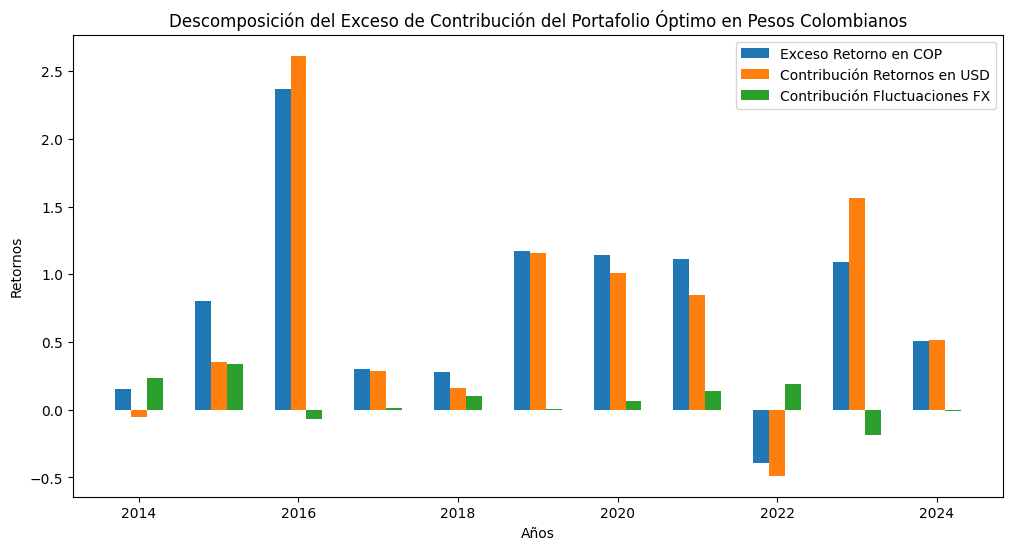

In [ ]:
contribucion = datos.exceso_contribucion()

---
El gráfico muestra la descomposición del exceso de contribución del portafolio óptimo en pesos colombianos, diferenciando entre el exceso de retorno en COP, la contribución de los retornos en USD y la contribución de las fluctuaciones cambiarias (FX). Observamos que en ciertos años, como 2016 y 2024, la contribución de los retornos en USD es significativamente alta, indicando que las inversiones en el mercado de acciones de Estados Unidos tuvieron un rendimiento notable en esos años. Sin embargo, es crucial notar la fluctuación en la contribución del riesgo cambiario (FX), que en algunos años, como 2018 y 2022, tiene un impacto negativo o casi nulo. Esto sugiere que las variaciones en el tipo de cambio pueden mitigar o amplificar los retornos de las inversiones en acciones de EE.UU. en pesos colombianos. Por lo tanto, para los inversionistas colombianos, es esencial considerar el riesgo cambiario como un factor crítico que puede afectar sustancialmente el rendimiento de sus portafolios internacionales.



